In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Train_data.csv")
test = pd.read_csv("Test_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

In [4]:
df.isnull().sum()

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64

More than 75% of values for "Outcome" are missing, therefore dropping it

In [5]:
df = df.drop(columns=["Outcome"])
test = test.drop(columns=["Outcome"])

In [6]:
df.job_type = df.job_type.fillna("NaN")
test.job_type = test.job_type.fillna("NaN")

In [7]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,1


In [8]:
df = df.sort_values(by="age")

In [9]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
2166,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,13:30:30,13:34:57,1
140,18.0,student,single,NaN,0,108.0,0,0,cellular,8,sep,1,-1,0,11:48:16,11:51:05,1
2903,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,13:30:30,13:34:57,1
1134,18.0,student,single,primary,0,608.0,0,0,cellular,13,nov,1,93,1,09:54:30,09:58:00,1
760,19.0,student,single,secondary,0,329.0,0,0,cellular,22,oct,2,-1,0,14:10:47,14:14:59,1


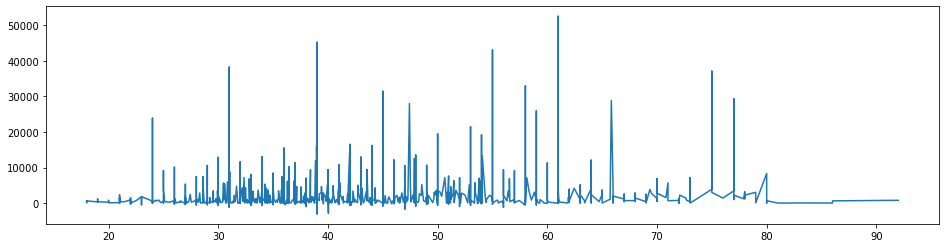

In [10]:
plt.figure(figsize=(16,4))
plt.plot(df.age, df.balance_amt)

Not a clear correlation between age and balance_amt

In [11]:
np.unique(df.job_type)

array(['NaN', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed'], dtype=object)

<AxesSubplot:xlabel='job_type', ylabel='count'>

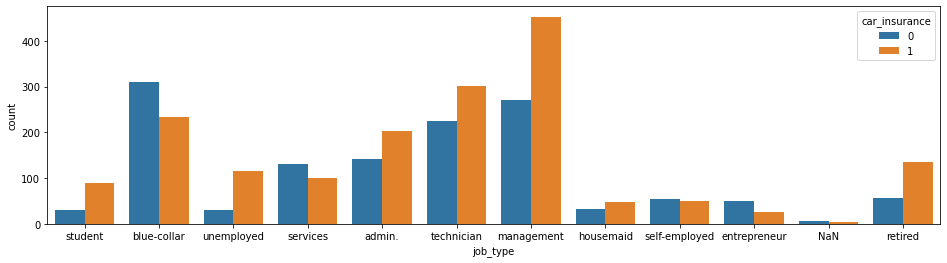

In [12]:
plt.figure(figsize=(16, 4))
sns.countplot(data=df, x="job_type", hue="car_insurance")

In [13]:
np.unique(df.marital_status)

array(['divorced', 'married', 'single'], dtype=object)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

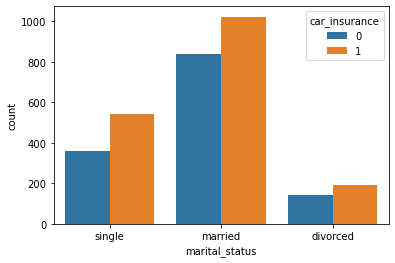

In [14]:
sns.countplot(data=df, x="marital_status", hue="car_insurance")

In [15]:
df.education_level = df.education_level.fillna("NaN")
test.education_level = test.education_level.fillna("NaN")
np.unique(df.education_level)

array(['NaN', 'primary', 'secondary', 'tertiary'], dtype=object)

<AxesSubplot:xlabel='education_level', ylabel='count'>

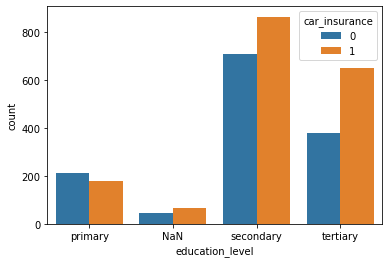

In [16]:
sns.countplot(data=df, x="education_level", hue="car_insurance")

Could easily be treated as ordinal data

In [17]:
np.unique(df.default_or_not)

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='default_or_not', ylabel='count'>

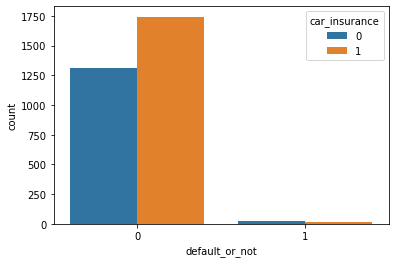

In [18]:
sns.countplot(data=df, x="default_or_not", hue="car_insurance")

Could be dropped, no significant information gain

In [19]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance
2166,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,13:30:30,13:34:57,1
140,18.0,student,single,NaN,0,108.0,0,0,cellular,8,sep,1,-1,0,11:48:16,11:51:05,1
2903,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,13:30:30,13:34:57,1
1134,18.0,student,single,primary,0,608.0,0,0,cellular,13,nov,1,93,1,09:54:30,09:58:00,1
760,19.0,student,single,secondary,0,329.0,0,0,cellular,22,oct,2,-1,0,14:10:47,14:14:59,1


<AxesSubplot:xlabel='balance_amt', ylabel='Count'>

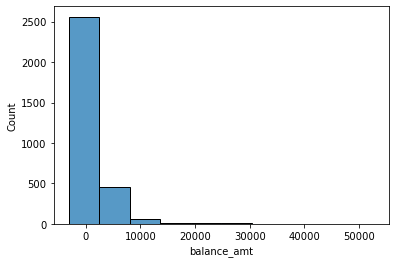

In [20]:
sns.histplot(data=df, x="balance_amt", bins=10)

In [21]:
print(np.max(df.balance_amt), np.average(df.balance_amt))

52587.0 1543.0672396997843


<AxesSubplot:xlabel='household_insurance', ylabel='count'>

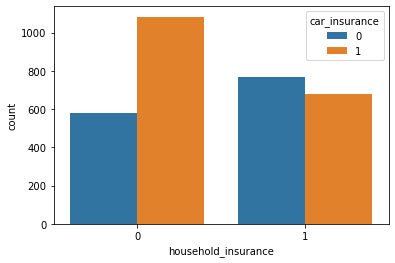

In [22]:
sns.countplot(data=df, x="household_insurance", hue="car_insurance")

People without household insurance are more likely to purchase car insurance

<AxesSubplot:xlabel='car_loan', ylabel='count'>

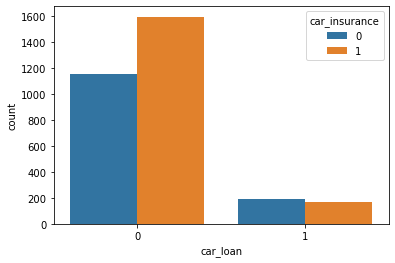

In [23]:
sns.countplot(data=df, x="car_loan", hue="car_insurance")

People with car loan are more likely to purchase car insurance

<AxesSubplot:xlabel='communication', ylabel='count'>

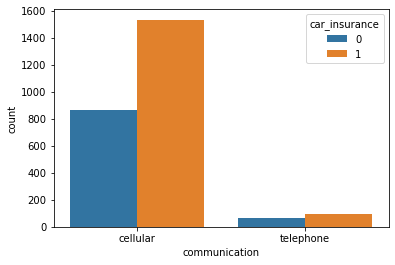

In [24]:
sns.countplot(data=df, x="communication", hue="car_insurance")

Is this indicative of something?

<AxesSubplot:xlabel='last_contact_day', ylabel='Count'>

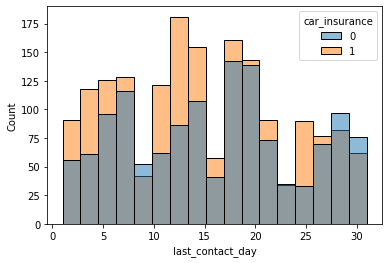

In [25]:
sns.histplot(data=df, x="last_contact_day", hue="car_insurance")

Insurance is more likely to be sold if contact was recent

In [26]:
np.dtype(df.call_end)

dtype('O')

In [27]:
df_st = pd.to_datetime(df.call_start.values, format="%H:%M:%S")
df_end = pd.to_datetime(df.call_end.values, format="%H:%M:%S")

test_st = pd.to_datetime(test.call_start.values, format="%H:%M:%S")
test_end = pd.to_datetime(test.call_end.values, format="%H:%M:%S")

In [28]:
df["call_duration"] = (df_end - df_st).seconds
test["call_duration"] = (test_end - test_st).seconds

In [29]:
df = df.drop(columns=["call_start", "call_end"])
test = test.drop(columns=["call_start", "call_end"])

In [30]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,car_insurance,call_duration
2166,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,1,267
140,18.0,student,single,NaN,0,108.0,0,0,cellular,8,sep,1,-1,0,1,169
2903,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,1,267
1134,18.0,student,single,primary,0,608.0,0,0,cellular,13,nov,1,93,1,1,210
760,19.0,student,single,secondary,0,329.0,0,0,cellular,22,oct,2,-1,0,1,252


<AxesSubplot:xlabel='call_duration', ylabel='Count'>

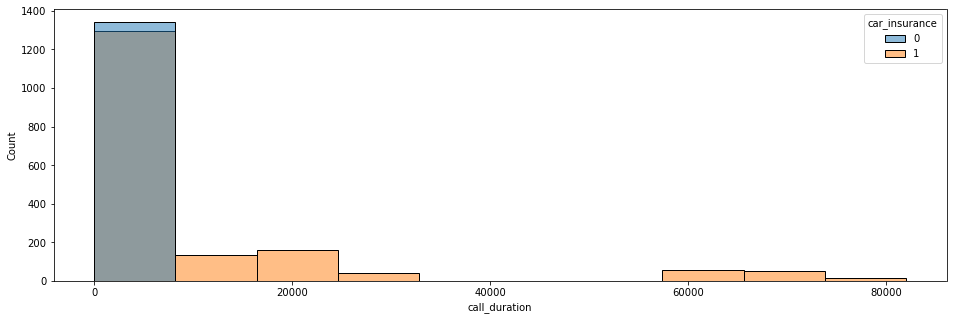

In [31]:
plt.figure(figsize=(16,5))
sns.histplot(data=df, x="call_duration", hue="car_insurance", bins=10,)

There were 16 hour long calls? -_-

In [32]:
np.max(df.call_duration)

82025

In [33]:
np.average(df.call_duration)

5032.00354609929

Calls longer than 3 hours have more chances of success

<AxesSubplot:xlabel='car_insurance', ylabel='count'>

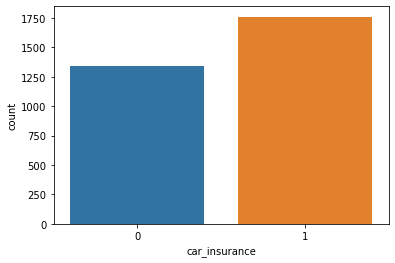

In [34]:
sns.countplot(data=df, x="car_insurance")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2166 to 1580
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3102 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      3102 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  car_insurance        3102 non-null   int64  
 15  call_duration        3102 non-null 

In [36]:
df.isnull().sum()

age                      0
job_type                 0
marital_status           0
education_level          0
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          543
last_contact_day         0
last_contact_month       0
no_of_contacts           0
days_passed              0
prev_attempts            0
car_insurance            0
call_duration            0
dtype: int64

## Pre-Processing

In [37]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,car_insurance,call_duration
2166,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,1,267
140,18.0,student,single,NaN,0,108.0,0,0,cellular,8,sep,1,-1,0,1,169
2903,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,1,267
1134,18.0,student,single,primary,0,608.0,0,0,cellular,13,nov,1,93,1,1,210
760,19.0,student,single,secondary,0,329.0,0,0,cellular,22,oct,2,-1,0,1,252


In [38]:
df.columns

Index(['age', 'job_type', 'marital_status', 'education_level',
       'default_or_not', 'balance_amt', 'household_insurance', 'car_loan',
       'communication', 'last_contact_day', 'last_contact_month',
       'no_of_contacts', 'days_passed', 'prev_attempts', 'car_insurance',
       'call_duration'],
      dtype='object')

In [39]:
df = df.drop(columns=['last_contact_day', 'last_contact_month'])
test = test.drop(columns=['last_contact_day', 'last_contact_month'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2166 to 1580
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3102 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      3102 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   no_of_contacts       3102 non-null   int64  
 10  days_passed          3102 non-null   int64  
 11  prev_attempts        3102 non-null   int64  
 12  car_insurance        3102 non-null   int64  
 13  call_duration        3102 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 428.1+ KB


In [41]:
df.isnull().sum()

age                      0
job_type                 0
marital_status           0
education_level          0
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          543
no_of_contacts           0
days_passed              0
prev_attempts            0
car_insurance            0
call_duration            0
dtype: int64

job_type and education_level have "NaN" as string

### Imputing manually

In [42]:
df.job_type.mode()

0    management
dtype: object

In [43]:
df.job_type = df.job_type.replace({"NaN":"management"})

In [44]:
test.job_type.mode()

0    management
dtype: object

In [45]:
test.job_type = test.job_type.replace({"NaN":"management"})

In [46]:
df.education_level.mode()

0    secondary
dtype: object

In [47]:
df.education_level = df.education_level.replace({"NaN":"secondary"})

In [48]:
test.education_level.mode()

0    secondary
dtype: object

In [49]:
test.education_level = test.education_level.replace({"NaN":"secondary"})

In [50]:
df.isnull().sum()

age                      0
job_type                 0
marital_status           0
education_level          0
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          543
no_of_contacts           0
days_passed              0
prev_attempts            0
car_insurance            0
call_duration            0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2166 to 1580
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3102 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      3102 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   no_of_contacts       3102 non-null   int64  
 10  days_passed          3102 non-null   int64  
 11  prev_attempts        3102 non-null   int64  
 12  car_insurance        3102 non-null   int64  
 13  call_duration        3102 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 428.1+ KB


In [52]:
np.unique(df.education_level)

array(['primary', 'secondary', 'tertiary'], dtype=object)

In [53]:
ed_order = {
    'primary': 1, 'secondary': 2, 'tertiary': 3
}

In [54]:
df.education_level = df.education_level.replace(ed_order)
test.education_level = test.education_level.replace(ed_order)

In [55]:
df = pd.get_dummies(df, columns=["job_type"], prefix="job")
test = pd.get_dummies(test, columns=["job_type"], prefix="job")

In [56]:
df = pd.get_dummies(df, columns=["marital_status"], prefix="martial_status")
test = pd.get_dummies(test, columns=["marital_status"], prefix="martial_status")

In [57]:
df = pd.get_dummies(df, columns=["communication"], prefix="communication")
test = pd.get_dummies(test, columns=["communication"], prefix="communication")

In [58]:
df.head()

,age,education_level,default_or_not,balance_amt,household_insurance,car_loan,no_of_contacts,days_passed,prev_attempts,car_insurance,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,martial_status_divorced,martial_status_married,martial_status_single,communication_cellular,communication_telephone
2166,18.0,1,0,608.0,0,0,1,-1,0,1,...,0,0,1,0,0,0,0,1,1,0
140,18.0,2,0,108.0,0,0,1,-1,0,1,...,0,0,1,0,0,0,0,1,1,0
2903,18.0,1,0,608.0,0,0,1,-1,0,1,...,0,0,1,0,0,0,0,1,1,0
1134,18.0,1,0,608.0,0,0,1,93,1,1,...,0,0,1,0,0,0,0,1,1,0
760,19.0,2,0,329.0,0,0,2,-1,0,1,...,0,0,1,0,0,0,0,1,1,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2166 to 1580
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      3102 non-null   float64
 1   education_level          3102 non-null   int64  
 2   default_or_not           3102 non-null   int64  
 3   balance_amt              3102 non-null   float64
 4   household_insurance      3102 non-null   int64  
 5   car_loan                 3102 non-null   int64  
 6   no_of_contacts           3102 non-null   int64  
 7   days_passed              3102 non-null   int64  
 8   prev_attempts            3102 non-null   int64  
 9   car_insurance            3102 non-null   int64  
 10  call_duration            3102 non-null   int64  
 11  job_admin.               3102 non-null   uint8  
 12  job_blue-collar          3102 non-null   uint8  
 13  job_entrepreneur         3102 non-null   uint8  
 14  job_housemaid        

In [60]:
df.to_csv("clean_train.csv", index=False)
test.to_csv("clean_test.csv", index=False)

<AxesSubplot:>

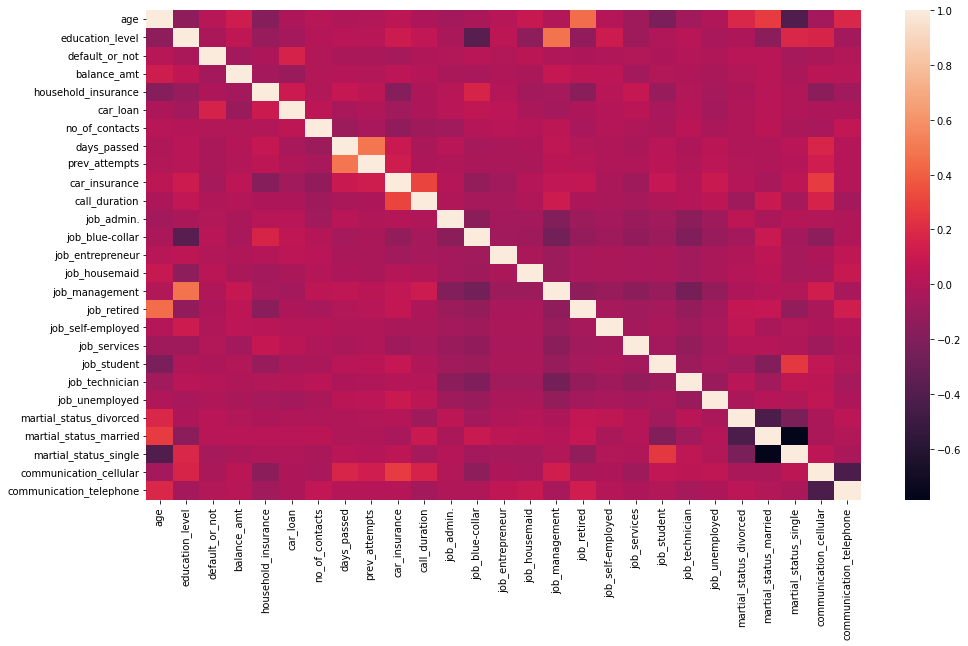

In [61]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr())

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X, y = df.drop(columns=["car_insurance"]), df.car_insurance

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

dt.score(X_valid, y_valid)

0.8148148148148148

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

rf.score(X_valid, y_valid)

0.8727858293075684

### Hyperparameter Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
param_grid = [
    {"n_estimators": np.linspace(10, 1000, 100, dtype=np.uint8)}, {"citerion": ["gini", "entropy"]},
    {"max_depth": [None] + list(range(5, 500, 100))}, 
    {"min_samples_split": np.linspace(2, 500, 100, dtype=np.uint8)},
    {"min_samples_leaf": np.linspace(1, 1000, 100, dtype=np.uint8)}, {"max_features": ["auto", "sqrt", "log2"]},
    {"max_leaf_nodes": np.linspace(1, 1000, 100, dtype=np.uint8)}, {"bootstrap": [True, False]}
]

In [70]:
rf = RandomForestClassifier(random_state=42)

In [71]:
random_cv = RandomizedSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)

In [72]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions=[{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,   4,
        14,  24,  34,  44,  54,  64,  74,  84,  94, 104, 114, 124, 134,
       144, 154, 164, 174, 184, 194, 204, 214, 224, 234, 244, 254,   8,
        18,  28,  38,  48,  58,  68,  78,  88,  98, 108, 118, 1...
       132, 142, 152, 162, 172, 182, 192, 202, 212, 223, 233, 243, 253,
         7,  17,  27,  37,  47,  57,  67,  78,  88,  98, 108, 118, 128,
       138, 148, 158, 168, 178, 189, 199, 209, 219, 229, 239, 249,   3,
        13,  23,  33,  44,  54,  64,  74,  84,  94, 104, 114, 124, 134,
       144, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,  10,
        20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 121, 131, 141,
       151, 161, 171, 181, 191, 201, 211, 221, 232

In [73]:
random_cv.best_estimator_.score(X_valid, y_valid)

0.8631239935587761

In [74]:
test_data_predictions = random_cv.best_estimator_.predict(test)

In [78]:
len(test_data_predictions) == len(test)

True

In [79]:
final_preds = pd.DataFrame(test_data_predictions, columns=["predictions"])

In [80]:
final_preds.head()

,predictions
0,1
1,0
2,1
3,1
4,0


In [82]:
final_preds.to_csv("predictions.csv")